In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import itertools
import warnings

# Suppress warnings from pyvis and matplotlib
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
def build_network_from_csv(csv_file):
    """
    Builds a weighted co-occurrence network from the reference dataset.
    """
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: '{csv_file}' not found. Please ensure it's in the same directory.")
        return None
    
    df['Characters_Involved'] = df['Characters_Involved'].fillna('')
    G = nx.Graph()
    
    print("Building the network...")
    for _, row in df.iterrows():
        characters = row['Characters_Involved'].split('; ')
        characters = [char for char in characters if char]
        
        if len(characters) >= 2:
            pairs = list(itertools.combinations(characters, 2))
            
            for (char1, char2) in pairs:
                if G.has_edge(char1, char2):
                    G[char1][char2]['weight'] += 1
                else:
                    G.add_edge(char1, char2, weight=1)
                    
    return G

def plot_static_network(G, filename='ramayan_static_network.png'):
    """
    Generates a static plot of the network using matplotlib.
    Node size is based on degree, edge width is based on weight.
    Now also displays the plot inline.
    """
    if G is None or G.number_of_nodes() == 0:
        print("Cannot plot an empty graph.")
        return

    print(f"Generating static plot... saving to {filename} and displaying inline.")
    
    pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)
    degrees = G.degree()
    node_sizes = [d[1] * 70 for d in degrees]
    
    weights = nx.get_edge_attributes(G, 'weight')
    # Ensure all edges in G.edges() are in the weights dict, or handle gracefully
    edge_widths = [weights.get(edge, 0) * 0.3 for edge in G.edges()]

    plt.figure(figsize=(24, 24))
    
    nx.draw_networkx_nodes(G, pos, 
                           node_size=node_sizes, 
                           node_color='lightblue', 
                           alpha=0.9)
    
    nx.draw_networkx_edges(G, pos, 
                           width=edge_widths, 
                           edge_color='grey', 
                           alpha=0.5)
    
    nx.draw_networkx_labels(G, pos, 
                            font_size=10, 
                            font_family='sans-serif')
    
    plt.title("Aggregate Ramayana Character Network", fontsize=30)
    plt.axis('off')
    
    try:
        plt.savefig(filename, bbox_inches='tight', dpi=150)
        print(f"Successfully saved static plot to {filename}")
    except Exception as e:
        print(f"Error saving plot: {e}")
    
    # --- THIS IS THE NEW LINE TO DISPLAY THE PLOT ---
    plt.show()
    # ------------------------------------------------
    
    plt.close() # Clean up plot from memory after showing and saving

def plot_interactive_network(G, filename='ramayan_network_interactive.html'):
    """
    Generates an interactive HTML plot of the network using pyvis.
    """
    if G is None or G.number_of_nodes() == 0:
        print("Cannot plot an empty graph.")
        return

    print(f"Generating interactive plot... saving to {filename}")
    
    nt = Network(height='800px', width='100%', notebook=False, 
                 heading='Ramayana Character Network (Interactive)')
    
    nt.from_nx(G)
    nt.toggle_physics(True)
    
    nt.set_options("""
    var options = {
      "nodes": {
        "font": {
          "size": 12
        }
      },
      "edges": {
        "color": {
          "inherit": "from"
        },
        "smooth": {
          "type": "continuous"
        }
      },
      "physics": {
        "barnesHut": {
          "gravitationalConstant": -8000,
          "springConstant": 0.001,
          "springLength": 200
        },
        "minVelocity": 0.75
      }
    }
    """)
    
    try:
        nt.save_graph(filename)
        print(f"Successfully saved interactive plot to {filename}")
    except Exception as e:
        print(f"Error saving interactive plot: {e}")

Building the network...

--- Network Info ---
Nodes: 24
Edges: 82
----------------------

Generating static plot... saving to ramayan_static_network.png and displaying inline.
Successfully saved static plot to ramayan_static_network.png


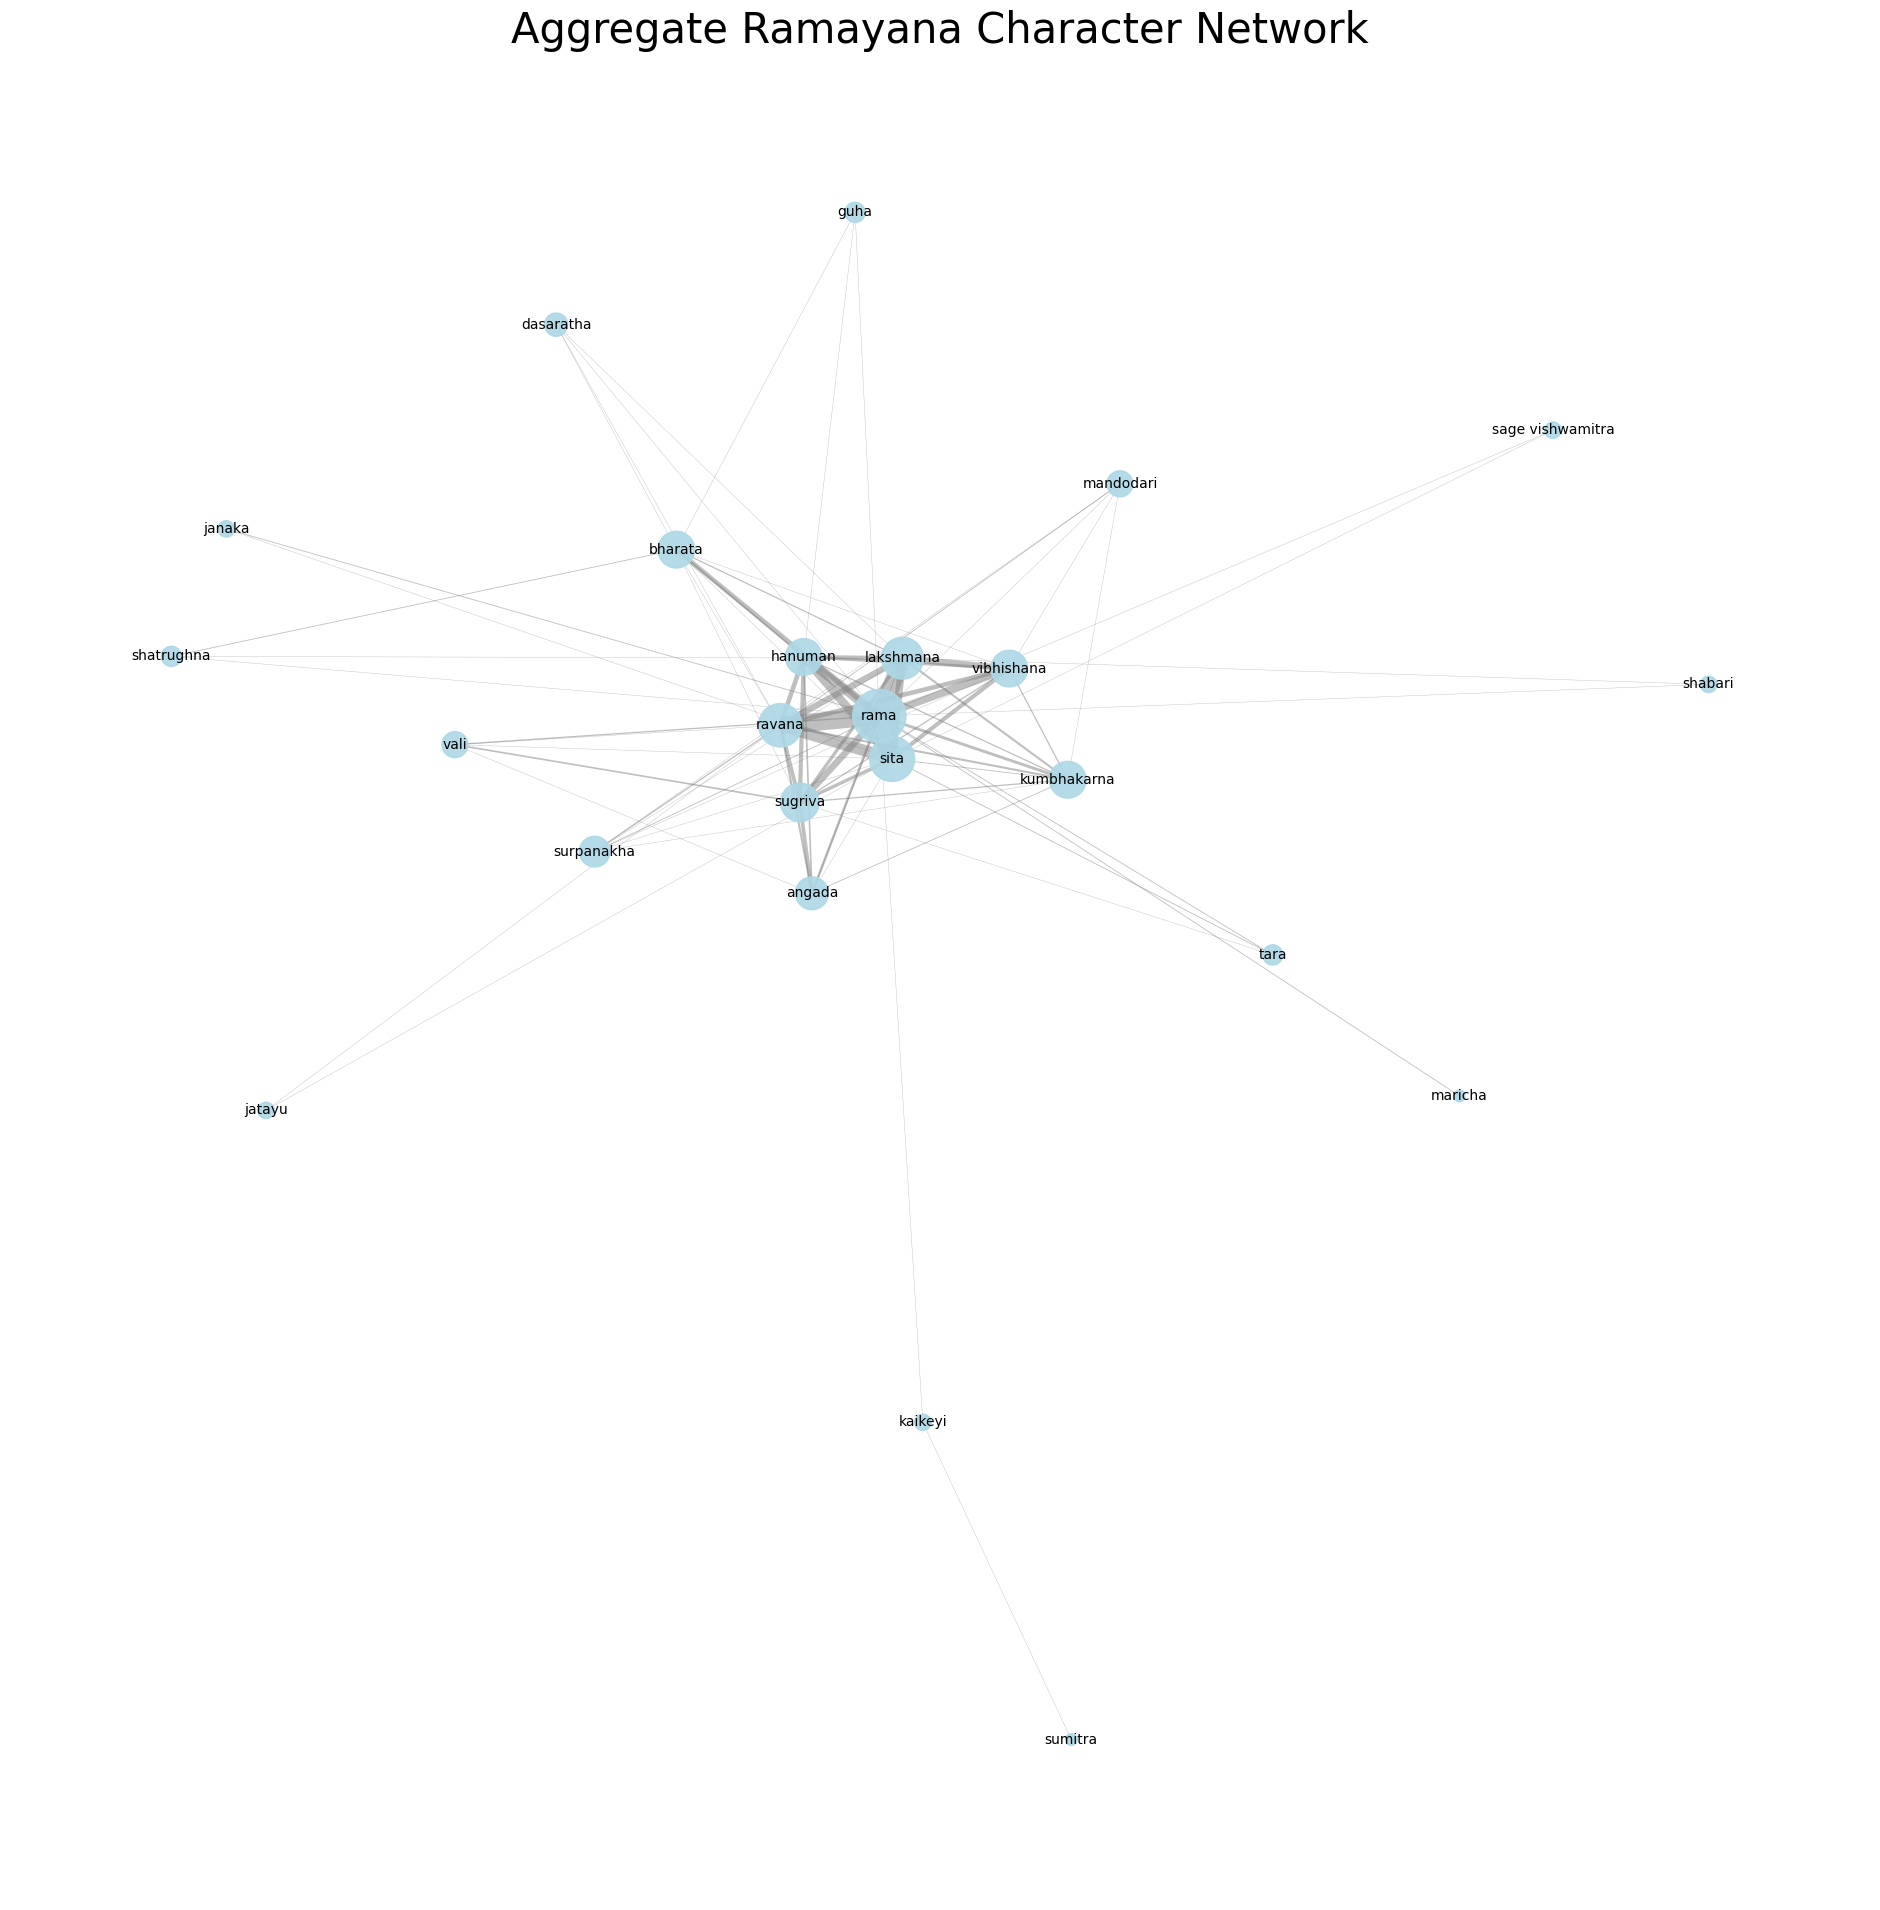

Generating interactive plot... saving to ramayan_network_interactive.html
Successfully saved interactive plot to ramayan_network_interactive.html

Process complete. Check the directory for the .png and .html files.


In [10]:
if __name__ == "__main__":
    # 1. Build the network
    ramayan_graph = build_network_from_csv('reference_dataset.csv')
    
    if ramayan_graph:
        # 2. Print basic info (Fixed for new NetworkX versions)
        print("\n--- Network Info ---")
        print(f"Nodes: {ramayan_graph.number_of_nodes()}")
        print(f"Edges: {ramayan_graph.number_of_edges()}")
        print("----------------------\n")
        
        # 3. Plot the static network (this will now display inline)
        plot_static_network(ramayan_graph)
        
        # 4. Plot the interactive network
        plot_interactive_network(ramayan_graph)
        
        print("\nProcess complete. Check the directory for the .png and .html files.")